Name: Alcontin, Angelo P.

Student Number: 2022101212

Course/Section: DS100-1/B31

M2 Programming Exercise


In this M2 programming exercise, we will continue to work with the dataset titled Annual plastic waste by disposal method, covering the years 2000 to 2019. This dataset provides insights into the management of plastic waste over two decades, offering valuable information on the methods used for disposing of plastic waste.

DATA SOURCE: https://ourworldindata.org/grapher/plastic-fate?tab=table

In [152]:
import requests as rq
from io import BytesIO

In [153]:
import numpy as np
import pandas as pd

In [154]:
url = 'https://github.com/NEXangelo/DS100-M1-PROGRAM-EXERCISE-/raw/main/DS-DATASET-plastic-fate.xlsx'
dt = rq.get(url).content
data = pd.read_excel(BytesIO(dt))
pd.set_option('display.max_rows',None)
data.head()

,Entity,Code,Year,Recycled,Incinerated,Littered and mismanaged,Landfilled
0,Americas (excl. USA),NaN,2000,772024.0,199475.0,5346765,10031376.0
1,Americas (excl. USA),NaN,2001,855770.0,208013.0,5619297,10526961.0
2,Americas (excl. USA),NaN,2002,960160.0,219964.0,5989772,11197690.0
3,Americas (excl. USA),NaN,2003,1066836.0,230851.0,6333178,11828031.0
4,Americas (excl. USA),NaN,2004,1189151.0,243482.0,6729046,12555211.0


In [155]:
#selecting the Countries 
country_data = data.loc[data['Entity'].str.contains('United States|China$')]
country_data.update(country_data[['Year','Recycled', 'Incinerated','Littered and mismanaged', 'Landfilled' ]].fillna(0))
if 'Code' in country_data.columns:
    country_data.drop(columns=['Code'], inplace=True)

/var/folders/4m/hp8_gf8n70s7tw1jt5x_ykl80000gn/T/ipykernel_8537/1100875033.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [156]:
# Filter the DataFrame to include only the years from 2000 to 2019
country_data = country_data[(country_data['Year'] >= 2000) & (country_data['Year'] <= 2019)]

In [157]:
country_data = country_data.copy()

# Calculate total trash and percentages
country_data['Total Trash (Tones)'] = (country_data['Recycled'] + country_data['Incinerated'] + country_data['Littered and mismanaged'] + country_data['Landfilled'])

# Calculate percentages
country_data['Recycled Percentage'] = np.round((country_data['Recycled'] / country_data['Total Trash (Tones)']) * 100, 2)
country_data['Incinerated Percentage'] = np.round((country_data['Incinerated'] / country_data['Total Trash (Tones)']) * 100, 2)
country_data['Littered and mismanaged Percentage'] = np.round((country_data['Littered and mismanaged'] / country_data['Total Trash (Tones)']) * 100, 2)
country_data['Landfilled Percentage'] = np.round((country_data['Landfilled'] / country_data['Total Trash (Tones)']) * 100, 2)

# Fill NaN values with 0
country_data.update(country_data[['Recycled Percentage', 'Incinerated Percentage', 'Littered and mismanaged Percentage', 'Landfilled Percentage']].fillna(0))
country_data = country_data[['Entity', 'Year', 'Total Trash (Tones)', 'Recycled Percentage', 'Incinerated Percentage', 'Littered and mismanaged Percentage', 'Landfilled Percentage']]


In [158]:
# Calculate 'Sustainable Waste Management' percentage
country_data['Sustainable Waste Management Percentage'] = (country_data['Recycled Percentage'] + country_data['Incinerated Percentage'])

# Format the percentages with a percentage sign
country_data['Sustainable Waste Management Percentage'] = country_data['Sustainable Waste Management Percentage']

# Calculate 'Mismanaged Waste Disposal' percentage
country_data['Mismanaged Waste Disposal Percentage'] = (country_data['Littered and mismanaged Percentage'] + country_data['Landfilled Percentage'])

# Format the percentages with a percentage sign
country_data['Mismanaged Waste Disposal Percentage'] = country_data['Mismanaged Waste Disposal Percentage']

# Display the updated DataFrame with required columns

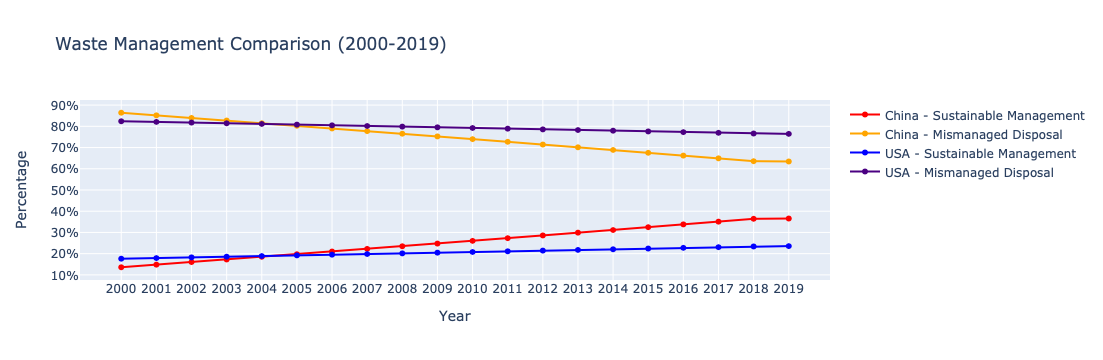

In [159]:
import plotly.graph_objects as go

# Filter data for China and USA
china_data = country_data[country_data['Entity'] == 'China']
usa_data = country_data[country_data['Entity'] == 'United States']

# Create a figure object
fig = go.Figure()

# Add line plot for China
fig.add_trace(go.Scatter(x=china_data['Year'], y=china_data['Sustainable Waste Management Percentage'],
                         mode='lines+markers', name='China - Sustainable Management',
                         line=dict(color='red', width=2)))
fig.add_trace(go.Scatter(x=china_data['Year'], y=china_data['Mismanaged Waste Disposal Percentage'],
                         mode='lines+markers', name='China - Mismanaged Disposal',
                         line=dict(color='orange', width=2)))

# Add line plot for USA
fig.add_trace(go.Scatter(x=usa_data['Year'], y=usa_data['Sustainable Waste Management Percentage'],
                         mode='lines+markers', name='USA - Sustainable Management',
                         line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=usa_data['Year'], y=usa_data['Mismanaged Waste Disposal Percentage'],
                         mode='lines+markers', name='USA - Mismanaged Disposal',
                         line=dict(color='indigo', width=2)))

# Update layout
fig.update_layout(title='Waste Management Comparison (2000-2019)',
                  xaxis_title='Year',
                  yaxis_title='Percentage',
                  legend=dict(x=1.02, y=1, traceorder="normal"),  # Position legend outside the graph area
                  xaxis=dict(tickmode='array', tickvals=list(range(2000, 2020))),
                  yaxis=dict(tickmode='array', tickvals=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                             ticktext=['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']))

# Show the plot
fig.show()


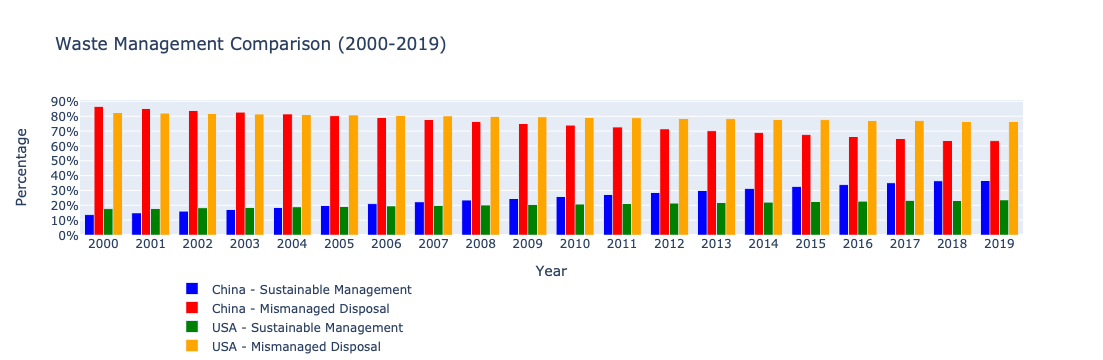

In [160]:
import plotly.graph_objects as go

# Filter data for China and USA
china_data = country_data[country_data['Entity'] == 'China']
usa_data = country_data[country_data['Entity'] == 'United States']

# Create a figure object
fig = go.Figure()

# Add bar plot for China
fig.add_trace(go.Bar(x=china_data['Year'], y=china_data['Sustainable Waste Management Percentage'],
                     name='China - Sustainable Management', marker_color='blue'))
fig.add_trace(go.Bar(x=china_data['Year'], y=china_data['Mismanaged Waste Disposal Percentage'],
                     name='China - Mismanaged Disposal', marker_color='red'))

# Add bar plot for USA
fig.add_trace(go.Bar(x=usa_data['Year'], y=usa_data['Sustainable Waste Management Percentage'],
                     name='USA - Sustainable Management', marker_color='green'))
fig.add_trace(go.Bar(x=usa_data['Year'], y=usa_data['Mismanaged Waste Disposal Percentage'],
                     name='USA - Mismanaged Disposal', marker_color='orange'))

# Update layout
fig.update_layout(barmode='group',
                  title='Waste Management Comparison (2000-2019)',
                  xaxis_title='Year',
                  yaxis_title='Percentage',
                  legend=dict(x=0.5, y=-0.2, orientation='h'),  # Position legend below the graph
                  xaxis=dict(tickmode='array',
                             tickvals=list(range(2000, 2020)),  # Generate list of years from 2000 to 2019
                             ticktext=[str(year) for year in range(2000, 2020)]),  # Convert years to string format
                  yaxis=dict(tickmode='array',
                             tickvals=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                             ticktext=['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']))

# Show the plot
fig.show()


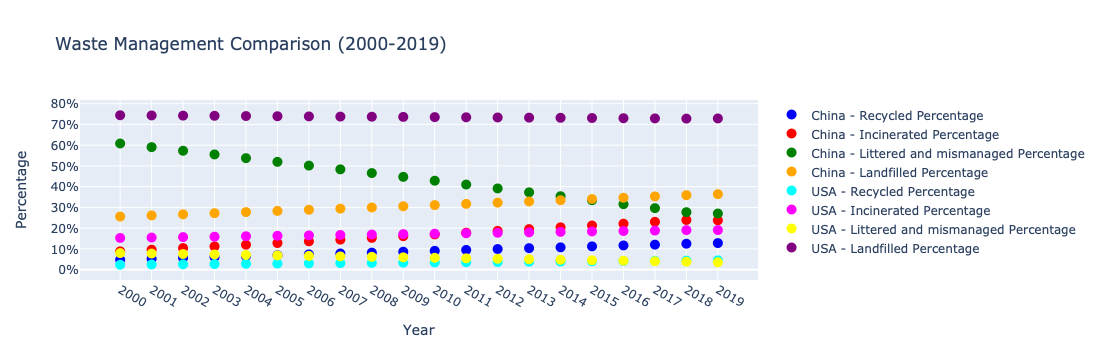

In [161]:
import plotly.graph_objects as go

# Create a figure object
fig = go.Figure()

# Add scatter plot for China - Recycled Percentage
fig.add_trace(go.Scatter(x=china_data['Year'], y=china_data['Recycled Percentage'],
                         mode='markers', name='China - Recycled Percentage',
                         marker=dict(color='blue', size=10)))

# Add scatter plot for China - Incinerated Percentage
fig.add_trace(go.Scatter(x=china_data['Year'], y=china_data['Incinerated Percentage'],
                         mode='markers', name='China - Incinerated Percentage',
                         marker=dict(color='red', size=10)))

# Add scatter plot for China - Littered and mismanaged Percentage
fig.add_trace(go.Scatter(x=china_data['Year'], y=china_data['Littered and mismanaged Percentage'],
                         mode='markers', name='China - Littered and mismanaged Percentage',
                         marker=dict(color='green', size=10)))

# Add scatter plot for China - Landfilled Percentage
fig.add_trace(go.Scatter(x=china_data['Year'], y=china_data['Landfilled Percentage'],
                         mode='markers', name='China - Landfilled Percentage',
                         marker=dict(color='orange', size=10)))

# Add scatter plot for USA - Recycled Percentage
fig.add_trace(go.Scatter(x=usa_data['Year'], y=usa_data['Recycled Percentage'],
                         mode='markers', name='USA - Recycled Percentage',
                         marker=dict(color='cyan', size=10)))

# Add scatter plot for USA - Incinerated Percentage
fig.add_trace(go.Scatter(x=usa_data['Year'], y=usa_data['Incinerated Percentage'],
                         mode='markers', name='USA - Incinerated Percentage',
                         marker=dict(color='magenta', size=10)))

# Add scatter plot for USA - Littered and mismanaged Percentage
fig.add_trace(go.Scatter(x=usa_data['Year'], y=usa_data['Littered and mismanaged Percentage'],
                         mode='markers', name='USA - Littered and mismanaged Percentage',
                         marker=dict(color='yellow', size=10)))

# Add scatter plot for USA - Landfilled Percentage
fig.add_trace(go.Scatter(x=usa_data['Year'], y=usa_data['Landfilled Percentage'],
                         mode='markers', name='USA - Landfilled Percentage',
                         marker=dict(color='purple', size=10)))

# Update layout
fig.update_layout(title='Waste Management Comparison (2000-2019)',
                  xaxis_title='Year',
                  yaxis_title='Percentage',
                  legend=dict(x=1.02, y=1, traceorder="normal"),  # Position legend outside the graph area
                  yaxis=dict(tickmode='array',
                             tickvals=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                             ticktext=['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']),
                  xaxis=dict(type='category', tickvals=china_data['Year'], ticktext=china_data['Year']))

# Show the plot
fig.show()


In [169]:
from dash import html, dcc
from dash import Dash
app = Dash(__name__)


import plotly.graph_objects as go
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Group data by country and calculate the mean percentage for each waste disposal method
country_means = country_data.groupby('Entity').mean()

# Create pie chart for China
labels = ['Recycled', 'Incinerated', 'Littered and Mismanaged', 'Landfilled']
china_values = country_means.loc['China'][['Recycled Percentage', 'Incinerated Percentage', 
                                           'Littered and mismanaged Percentage', 'Landfilled Percentage']]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
fig_china = go.Figure(data=[go.Pie(labels=labels, values=china_values, textinfo='percent+label',
                                   marker=dict(colors=colors))])

# Create pie chart for USA
usa_values = country_means.loc['United States'][['Recycled Percentage', 'Incinerated Percentage', 
                                                 'Littered and mismanaged Percentage', 'Landfilled Percentage']]
fig_usa = go.Figure(data=[go.Pie(labels=labels, values=usa_values, textinfo='percent+label',
                                 marker=dict(colors=colors))])

# Define the years for the dropdown options
years = country_data['Year'].unique()

# Define the layout for the dropdown and pie charts
app.layout = html.Div([
    html.Div([
        dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': str(year), 'value': year} for year in years],
            value=years[0]
        )
    ]),
    html.Div([
        dcc.Graph(id='china-pie-chart', figure=fig_china)
    ]),
    html.Div([
        dcc.Graph(id='usa-pie-chart', figure=fig_usa)
    ])
])

# Define callback to update the pie charts based on the selected year
@app.callback(
    [Output('china-pie-chart', 'figure'),
     Output('usa-pie-chart', 'figure')],
    [Input('year-dropdown', 'value')]
)
def update_pie_charts(selected_year):
    # Filter data for the selected year
    selected_year_data = country_data[country_data['Year'] == selected_year]
    
    # Group data by country and calculate the mean percentage for each waste disposal method
    country_means = selected_year_data.groupby('Entity').mean()
    
    # Update pie chart for China
    china_values = country_means.loc['China'][['Recycled Percentage', 'Incinerated Percentage', 
                                               'Littered and mismanaged Percentage', 'Landfilled Percentage']]
    fig_china = go.Figure(data=[go.Pie(labels=labels, values=china_values, textinfo='percent+label',
                                       marker=dict(colors=colors))])
    fig_china.update_layout(title_text=f"<b>China's Waste Disposal Methods ({selected_year})</b>",
                            title_font_size=20, title_x=0.5, title_y=0.95,
                            margin=dict(l=20, r=20, t=60, b=20))
    
    # Update pie chart for USA
    usa_values = country_means.loc['United States'][['Recycled Percentage', 'Incinerated Percentage', 
                                                     'Littered and mismanaged Percentage', 'Landfilled Percentage']]
    fig_usa = go.Figure(data=[go.Pie(labels=labels, values=usa_values, textinfo='percent+label',
                                     marker=dict(colors=colors))])
    fig_usa.update_layout(title_text=f"<b>USA's Waste Disposal Methods ({selected_year})</b>",
                          title_font_size=20, title_x=0.5, title_y=0.95,
                          margin=dict(l=20, r=20, t=60, b=20))
    
    return fig_china, fig_usa

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


LARGER DATA SET

In [164]:
url = 'https://github.com/NEXangelo/DS100-M1-PROGRAM-EXERCISE-/raw/main/DS-DATASET-plastic-fate.xlsx'
dt = rq.get(url).content
data = pd.read_excel(BytesIO(dt))
pd.set_option('display.max_rows',None)
data.head()

,Entity,Code,Year,Recycled,Incinerated,Littered and mismanaged,Landfilled
0,Americas (excl. USA),NaN,2000,772024.0,199475.0,5346765,10031376.0
1,Americas (excl. USA),NaN,2001,855770.0,208013.0,5619297,10526961.0
2,Americas (excl. USA),NaN,2002,960160.0,219964.0,5989772,11197690.0
3,Americas (excl. USA),NaN,2003,1066836.0,230851.0,6333178,11828031.0
4,Americas (excl. USA),NaN,2004,1189151.0,243482.0,6729046,12555211.0


In [165]:
country_data = data.copy()

# Update missing values with zeros
country_data.update(country_data[['Year','Recycled', 'Incinerated','Littered and mismanaged', 'Landfilled' ]].fillna(0))

# Drop 'Code' column if exists
if 'Code' in country_data.columns:
    country_data.drop(columns=['Code'], inplace=True)


In [166]:
country_data = country_data.copy()

# Calculate total trash and percentages
country_data['Total Trash (Tones)'] = (country_data['Recycled'] + country_data['Incinerated'] + country_data['Littered and mismanaged'] + country_data['Landfilled'])

# Calculate percentages
country_data['Recycled Percentage'] = np.round((country_data['Recycled'] / country_data['Total Trash (Tones)']) * 100, 2)
country_data['Incinerated Percentage'] = np.round((country_data['Incinerated'] / country_data['Total Trash (Tones)']) * 100, 2)
country_data['Littered and mismanaged Percentage'] = np.round((country_data['Littered and mismanaged'] / country_data['Total Trash (Tones)']) * 100, 2)
country_data['Landfilled Percentage'] = np.round((country_data['Landfilled'] / country_data['Total Trash (Tones)']) * 100, 2)

# Fill NaN values with 0
country_data.update(country_data[['Recycled Percentage', 'Incinerated Percentage', 'Littered and mismanaged Percentage', 'Landfilled Percentage']].fillna(0))
country_data = country_data[['Entity', 'Year', 'Total Trash (Tones)', 'Recycled Percentage', 'Incinerated Percentage', 'Littered and mismanaged Percentage', 'Landfilled Percentage']]
country_data


,Entity,Year,Total Trash (Tones),Recycled Percentage,Incinerated Percentage,Littered and mismanaged Percentage,Landfilled Percentage
0,Americas (excl. USA),2000,1.634964e+07,4.72,1.22,32.70,61.36
1,Americas (excl. USA),2001,1.721004e+07,4.97,1.21,32.65,61.17
2,Americas (excl. USA),2002,1.836759e+07,5.23,1.20,32.61,60.96
3,Americas (excl. USA),2003,1.945890e+07,5.48,1.19,32.55,60.78
4,Americas (excl. USA),2004,2.071689e+07,5.74,1.18,32.48,60.60
5,Americas (excl. USA),2005,2.176071e+07,5.99,1.16,32.39,60.46
6,Americas (excl. USA),2006,2.309970e+07,6.25,1.15,32.30,60.30
7,Americas (excl. USA),2007,2.451270e+07,6.50,1.14,32.20,60.15
8,Americas (excl. USA),2008,2.493901e+07,6.75,1.13,32.03,60.09
9,Americas (excl. USA),2009,2.595265e+07,7.00,1.12,31.88,60.00


In [172]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px

# Define the Dash app
app2 = dash.Dash(__name__)

# Define the layout
app2.layout = html.Div([
    # Dropdown to select the country
    html.Label('Select Country'),
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in country_data['Entity'].unique()],
        value='United States'
    ),
    # Slider to select the year range
    html.Label('Select Year Range'),
    dcc.RangeSlider(
        id='year-slider',
        min=2000,
        max=2019,
        step=1,
        marks={year: str(year) for year in range(2000, 2020)},
        value=[2000, 2019]
    ),
    # Line graph to display waste management percentages
    dcc.Graph(id='line-graph')
])

# Define callback to update the line graph based on user input
@app2.callback(
    Output('line-graph', 'figure'),
    [Input('country-dropdown', 'value'),
     Input('year-slider', 'value')]
)
def update_line_graph(selected_country, selected_year_range):
    # Filter data based on selected country and year range
    filtered_data = country_data[(country_data['Entity'] == selected_country) & 
                                 (country_data['Year'] >= selected_year_range[0]) & 
                                 (country_data['Year'] <= selected_year_range[1])]
    
    # Create line graph
    fig = px.line(filtered_data, x='Year', y=['Recycled Percentage', 'Incinerated Percentage',
                                              'Littered and mismanaged Percentage', 'Landfilled Percentage'],
                  title=f'{selected_country} Waste Management Percentages ({selected_year_range[0]}-{selected_year_range[1]})')
    
    # Update layout
    fig.update_layout(xaxis_title='Year',
                      yaxis_title='Percentage',
                      legend=dict(title='Waste Management Method', orientation='h', y=-0.2),
                      yaxis=dict(range=[0, 100], tickmode='array', tickvals=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                                 ticktext=['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']),
                      xaxis=dict(dtick=1))  # Specify the interval between ticks on the x-axis
    
    return fig

# Run the app on port 8051
if __name__ == '__main__':
    app2.run_server(debug=True, port=8051)



Visualizing waste management practices in China and the United States provides valuable insights into environmental sustainability trends and challenges. By examining critical metrics like recycling, incineration, littering, mismanaged waste, and landfilling of plastic waste, we can identify essential patterns and implications for policy and action.

One significant trend observed in the visualizations is the prevalence of mismanaged waste in both China and the United States. Despite differences in governance, infrastructure, and socio-economic factors, both countries need help managing waste, leading to considerable amounts of mismanaged waste. This highlights the urgent need for coordinated efforts and innovative solutions to address waste management challenges comprehensively.

The interactive nature of the graphs enhances the user experience and enables deeper data exploration. With features like dropdown menus, range sliders, and dynamic updates, users can interactively select specific countries, years, and waste management indicators of interest. This interactive functionality empowers users to delve into the data, identify trends, and gain deeper insights into waste management practices over time.

The interactive graphs are powerful tools for informing, decision-making, and fostering engagement in environmental sustainability efforts. Moreover, comparing waste management practices between countries allows for benchmarking and learning from best practices, contributing to global collaboration and knowledge-sharing in tackling waste management challenges.

Name: Alcontin, Angelo P.

Student Number: 2022101212